# About the project
### I used data contaning the models with a higher number of sales in Canada between 2019 and 2021 for this project.

### Some questions I'm interested in addressing:
### Which car brands are the most well-known?
### Do Canadians favour a particular class of vehicle?
### What are the most well-liked car models?

## Importing the librarys

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import xgboost as xgb
import matplotlib as plt

## Importing the data

In [5]:
data = pd.read_csv("/Users/vitoriawillanidealmeida/Desktop/DATA SCIENCE/Projetos próprios/Car_sales_canada/Canadasalesdata.csv")
data

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Subaru Outback,499,621,948,1065,1079,981,1074,845,644,926,1184,1106,10972,MS,2019
232,Toyota 4Runner,605,393,784,762,854,681,824,903,522,690,663,549,8230,MS,2019
233,Toyota Highlander,729,792,1184,1095,1185,1423,1347,1336,1114,1366,1316,924,13811,MS,2019
234,Volkswagen Atlas,530,521,822,925,881,725,761,769,748,933,695,601,8911,MS,2019


Columns:
model: which is the car model name
Jan :January
Feb:February
Mar:March
Apr:April
May:May
Jun:June
Jul:July
Aug:August
Sep:September
Oct:October
Nov:November
Dec:December
Sumofsales : is the sum of sale of each car model
Category : Contain 5 categories of cars
MLS :MIDSIZE LUXURY SUV SALES FIGURES
SLS:SMALL LUXURY SUV SALES FIGURES
LLS: LARGE LUXURY SUV SALES FIGURES
LS:LARGE SUV SALES FIGURES
MS:MIDSIZE SUV SALES FIGURES
Year : the year of sales

## Starting the data exploration process

In [6]:
data["Model"].unique()

array(['Acura MDX', 'Audi Q7', 'Audi Q8', 'BMW X5', 'BMW X6',
       'Cadillac XT5', 'Cadillac XT6', 'Genesis GV80', 'Infiniti QX60',
       'Jaguar F0Pace', 'Land Rover Defender',
       'Land Rover Discovery / LR4', 'Land Rover Range Rover Sport',
       'Land Rover Range Rover Velar', 'Lexus GX', 'Lexus RX',
       'Lincoln Aviator', 'Lincoln MKX/Nautilus', 'Maserati Levante',
       'Mercedes0Benz GLE0Class', 'Porsche Cayenne', 'Tesla Model X',
       'Volvo XC90', 'Alfa Romeo Stelvio', 'Audi eTron', 'Audi Q3',
       'Audi Q5', 'BMW X1', 'BMW X2', 'Cadillac XT4', 'Infiniti QX30',
       'Infiniti QX50', 'Jaguar E0Pace', 'Land Rover Discovery Sport',
       'Land Rover Range Rover Evoque', 'Lexus NX', 'Lexus UX',
       'Lincoln MKC', 'Mercedes0Benz GLA0Class',
       'Mercedes0Benz GLC/GLK0Class', 'Volvo XC40', 'Volvo XC60',
       'Infiniti QX55', 'Mercedes0Benz GLB', 'Tesla Model Y', 'BMW X7',
       'Cadillac Escalade', 'Infiniti QX80', 'Land Rover Range Rover',
       'Lexus L

### Aggregating sales over the years

In [7]:
sales_for_Year = data.groupby("Year")[["Sumofsales"]].sum()
sales_for_Year

,Sumofsales
Year,
2019,390825
2020,341736
2021,136104


### Ranking the number of sales for each model, we can see the top three models in terms of popularity: Jeep Grand Cherokee, Toyota Highlander, and Jeep Wrangler

In [8]:
sales_for_model = data.groupby("Model")[["Sumofsales"]].sum().sort_values(by = "Sumofsales", ascending = False).reset_index()
sales_for_model

,Model,Sumofsales
0,Jeep Wrangler,45892
1,Toyota Highlander,42741
2,Jeep Grand Cherokee,35626
3,Audi Q5,35460
4,Hyundai Santa Fe,34650
...,...,...
84,Ford Bronco Sport,195
85,Infiniti QX55,190
86,Infiniti QX30,189
87,Volkswagen Touareg,28


<Axes: xlabel='Model'>

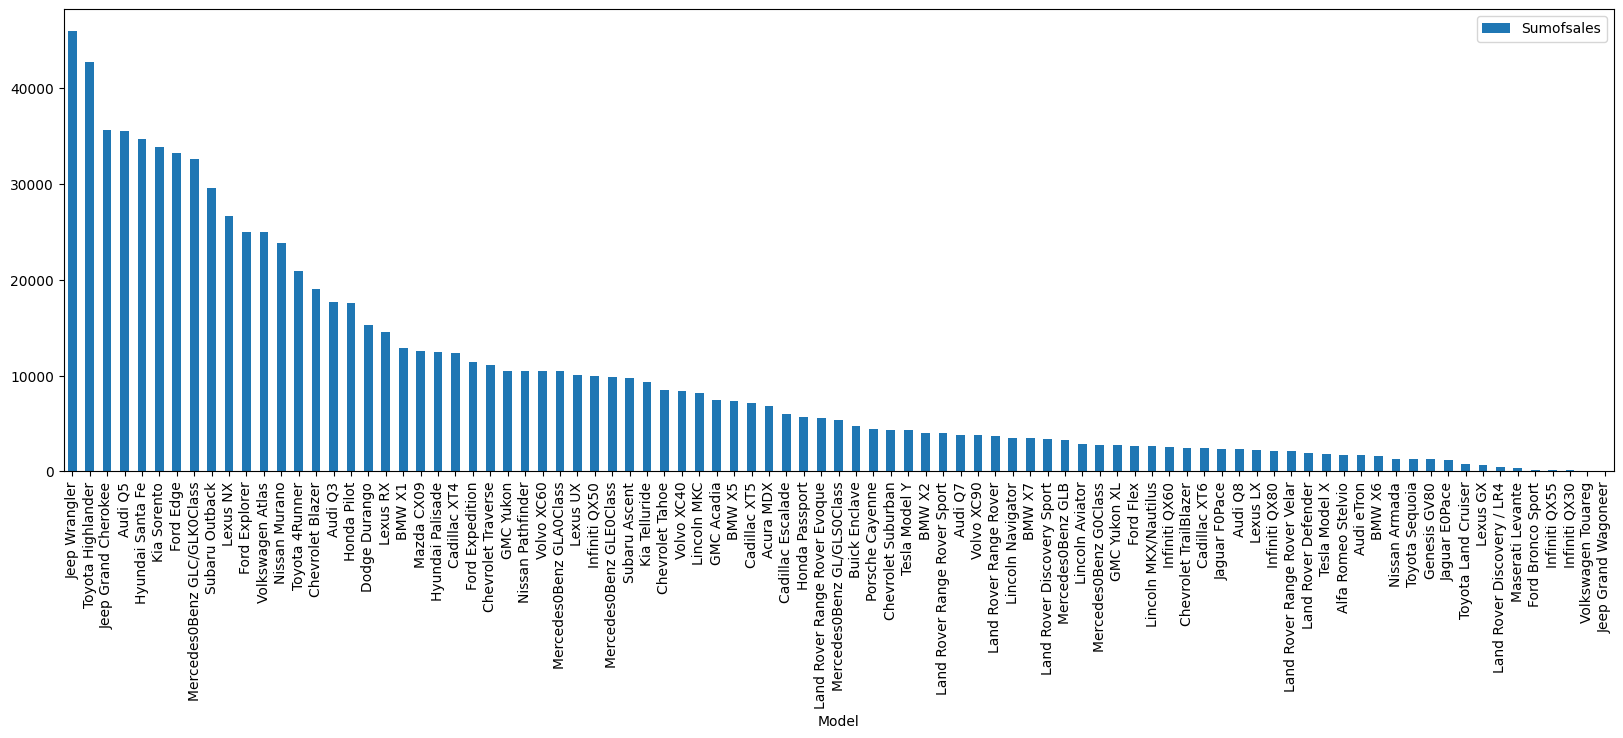

In [13]:
sales_for_model.plot(kind= "bar", x="Model", y="Sumofsales", figsize=(20,6))

### Jeep is the only manufacturer that appears more than once in the top ten models.  I'll focus my efforts on analyzing by brands.

In [14]:
sales_for_model[sales_for_model["Model"].str.contains('Jeep')]

,Model,Sumofsales
0,Jeep Wrangler,45892
2,Jeep Grand Cherokee,35626
88,Jeep Grand Wagoneer,4


In [15]:
Jeep_sales = 45892+35626+4
Jeep_sales

81522

### Doing this analysis by hand for each car manufacturer would be extremely time consuming, therefore I attempted to automate the search for car manufacturers; however, I have no method of recognizing the manufacturers, only the names of the models. As a result, I will do a manual study of the carmakers that appear in the top 20 in terms of sales.

In [53]:
words = sales_for_model["Model"].str.split(expand=True).stack().value_counts()
words


Rover            11
Land              8
Mercedes0Benz     6
Lexus             5
Ford              5
                 ..
GLA0Class         1
XC60              1
Pathfinder        1
Traverse          1
Wagoneer          1
Name: count, Length: 125, dtype: int64

In [17]:
sales_for_model.head(20)

,Model,Sumofsales
0,Jeep Wrangler,45892
1,Toyota Highlander,42741
2,Jeep Grand Cherokee,35626
3,Audi Q5,35460
4,Hyundai Santa Fe,34650
5,Kia Sorento,33846
6,Ford Edge,33178
7,Mercedes0Benz GLC/GLK0Class,32555
8,Subaru Outback,29520
9,Lexus NX,26647


In [18]:
Toyota_sales = 42741+20947
Toyota_sales

63688

In [19]:
Audi_sales = 35460+17641
Audi_sales

53101

In [20]:
Hyundai_sales = 34650

In [21]:
Kia_sales = 33846

In [22]:
Ford_sales= 33178 + 24950
Ford_sales

58128

In [23]:
Volkswagen_sales = 24928

In [24]:
Nissan_sales = 23782

In [25]:
Mercedes0Benz_sales = 32555

In [26]:
Subaru_sales = 29520

In [27]:
Lexus_sales = 26647+14580
Lexus_sales

41227

In [28]:
Chevrolet_sales = 19071

In [29]:
Honda_sales = 17581

In [30]:
Dodge_sales = 15287

In [31]:
BMW_sales = 12840

In [54]:
brands = [Toyota_sales, BMW_sales, Ford_sales, Hyundai_sales, Kia_sales, Audi_sales, Honda_sales, Chevrolet_sales, Dodge_sales,Lexus_sales,
              Subaru_sales,Mercedes0Benz_sales, Nissan_sales, Volkswagen_sales]

In [57]:

percentage_brand = {}
for brand in brands:
    percentage = brand / sales_for_model["Sumofsales"].head(20).sum()
    percentage_brand[brand] = percentage
for brand, percentage in percentage_brand.items():
    print(f"percentage of sales for {brand}: {percentage:.2%}")


percentage of sales for 63688: 11.76%
percentage of sales for 12840: 2.37%
percentage of sales for 58128: 10.73%
percentage of sales for 34650: 6.40%
percentage of sales for 33846: 6.25%
percentage of sales for 53101: 9.80%
percentage of sales for 17581: 3.25%
percentage of sales for 19071: 3.52%
percentage of sales for 15287: 2.82%
percentage of sales for 41227: 7.61%
percentage of sales for 29520: 5.45%
percentage of sales for 32555: 6.01%
percentage of sales for 23782: 4.39%
percentage of sales for 24928: 4.60%


In [67]:
percentage_brand = {"Toyota": 11.76, "Ford": 10.73, "Audi": 9.80}


In [68]:

top3_brands = pd.DataFrame(percentage_brand.items(), columns=["Brand", "Market percentage"])
top3_brands


,Brand,Market percentage
0,Toyota,11.76
1,Ford,10.73
2,Audi,9.80


In [69]:
top3_brands["Sales"] = [63688,58128,53101]

In [70]:
top3_brands

,Brand,Market percentage,Sales
0,Toyota,11.76,63688
1,Ford,10.73,58128
2,Audi,9.80,53101


### The size of the bubbles in the graphic is determined by the percentage of the market that particular automaker represents when the 20 best-selling models are entered.

In [71]:
px.scatter(data_frame = top3_brands, x = 'Brand', y = 'Sales', size = 'Market percentage')

### Let us now turn our attention to the models rather than the car manufacturer.

In [72]:
data.head(20)

,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Sumofsales,Category,Year
0,Acura MDX,93,389,782,611,550,501,0,0,0,0,0,0,2926,MLS,2021
1,Audi Q7,210,210,236,303,292,303,0,0,0,0,0,0,1554,MLS,2021
2,Audi Q8,130,130,146,211,203,211,0,0,0,0,0,0,1031,MLS,2021
3,BMW X5,323,323,364,518,498,518,0,0,0,0,0,0,2544,MLS,2021
4,BMW X6,72,72,81,113,108,113,0,0,0,0,0,0,559,MLS,2021
5,Cadillac XT5,378,378,425,575,553,575,0,0,0,0,0,0,2884,MLS,2021
6,Cadillac XT6,146,146,164,175,168,175,0,0,0,0,0,0,974,MLS,2021
7,Genesis GV80,108,106,160,154,146,168,121,0,0,0,0,0,963,MLS,2021
8,Infiniti QX60,130,130,146,95,91,95,0,0,0,0,0,0,687,MLS,2021
9,Jaguar F0Pace,116,116,131,184,177,184,0,0,0,0,0,0,908,MLS,2021


In [73]:
data["Year"].unique()

array([2021, 2020, 2019])

### Analyzing vehicle sales by category

In [74]:
category_sales = data.groupby("Category")[["Sumofsales"]].sum().sort_values(by= "Sumofsales", ascending= False)
category_sales

,Sumofsales
Category,
MS,490987
SLS,156244
MLS,151396
LS,40089
LLS,29949


In [75]:
category_sales.reset_index(inplace=True)

In [76]:
category_sales

,Category,Sumofsales
0,MS,490987
1,SLS,156244
2,MLS,151396
3,LS,40089
4,LLS,29949


In [44]:
import plotly.express as px

fig = px.sunburst(data, path=['Category', 'Model'], values='Sumofsales',
                  color='Sumofsales')
fig.show()


In [77]:
data.loc[:, 'Jan':'Dec'].sum(axis=0)

Jan    60655
Feb    73490
Mar    76153
Apr    73870
May    85698
Jun    86112
Jul    78181
Aug    68913
Sep    66448
Oct    67629
Nov    61207
Dec    70309
dtype: int64

In [46]:
sales_per_month = pd.DataFrame(data.loc[:, 'Jan':'Dec'].sum(axis=0))
sales_per_month.reset_index()

,index,0
0,Jan,60655
1,Feb,73490
2,Mar,76153
3,Apr,73870
4,May,85698
5,Jun,86112
6,Jul,78181
7,Aug,68913
8,Sep,66448
9,Oct,67629


In [47]:
sales_per_month = sales_per_month.rename(columns={0: 'Sales'})


In [48]:
sales_per_month.reset_index()

,index,Sales
0,Jan,60655
1,Feb,73490
2,Mar,76153
3,Apr,73870
4,May,85698
5,Jun,86112
6,Jul,78181
7,Aug,68913
8,Sep,66448
9,Oct,67629


In [78]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales = [60655, 73490, 76153, 73870, 85698, 86112, 78181, 68913, 66448, 67629, 61207, 70309]

In [82]:
sales_per_month = pd.DataFrame({"Month": months, "Sales": sales})

In [83]:
sales_per_month

,Month,Sales
0,Jan,60655
1,Feb,73490
2,Mar,76153
3,Apr,73870
4,May,85698
5,Jun,86112
6,Jul,78181
7,Aug,68913
8,Sep,66448
9,Oct,67629


### Analyzing vehicle sales by month

In [84]:
fig = px.line(sales_per_month, x="Month", y="Sales")
fig.show()

### Conclusions: The months with the biggest number of sales are May and June, and the vehicle category chosen by Canadian customers is midsize SUVs. Jeep is the most popular brand among consumers.